In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
V = 39

In [57]:
X = np.array([[40+V, 100-V, 30+V, 25+V, V, 100+V, 230-V, 110+V, 120+V, 180-V],
[10+V, 110-V, 20+V, 15+V, 105-V, 120+V, 220-V, 90+V, 200-V,160-V]])
classes = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2])
n_classes = 2
n1 = 6
n2 = 4
X

array([[ 79,  61,  69,  64,  39, 139, 191, 149, 159, 141],
       [ 49,  71,  59,  54,  66, 159, 181, 129, 161, 121]])

In [58]:
centroid1 = np.sum(X[:, classes==1]/n1, axis=1)
centroid2 = np.sum(X[:, classes==2]/n2, axis=1)
centroid2

array([160., 148.])

In [59]:
def vec_sq(v):
    result = np.zeros((len(v), len(v)))
    for i in range(len(v)):
        for j in range(len(v)):
            result[i, j] = v[i]*v[j]
    return result

In [60]:
S1 = np.zeros((n_classes, n_classes))
S2 = np.zeros((n_classes, n_classes))
for i in range(n1):
    S1 += vec_sq(X[:, i] - centroid1)
for j in range(n2):
    S2 += vec_sq(X[:, n1 + j] - centroid2)
    
Sw = S1 + S2

In [61]:
def euqlid_len(v):
    return np.sqrt(np.sum(v**2))

In [62]:
w = np.linalg.inv(Sw)@(centroid1 - centroid2)
w_norm = w/euqlid_len(w)

In [63]:
m = (n1*centroid1 + n2*centroid2)/(n1+n2)
w0=w_norm.dot(m)

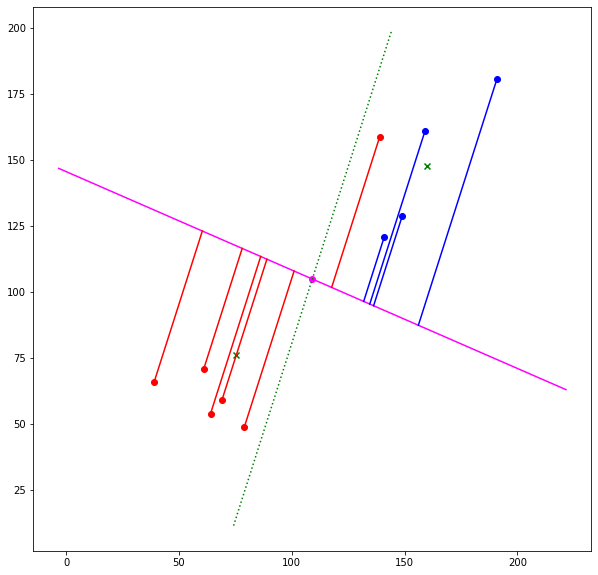

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
ax.scatter(X[0, :n1], X[1, :n1], c='red')
ax.scatter(X[0, n1:n1+n2], X[1, n1:n1+n2], c='blue')
# plot vector w
point1 = m - w_norm*120
point2 = m + w_norm*120
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], c='magenta')
# y = lx + k
l = w_norm[1]/w_norm[0]
k = m[1] - (w_norm[1]/w_norm[0])*m[0]

color = 'red'
for i in range(n1 + n2):
    p1 = X[:, i]
    x = (p1[0] + l*p1[1] - l*k)/(l**2 + 1)
    y = l*(p1[0] + l*p1[1] - l*k)/(l**2 + 1) + k
    if i >= n1:
        color = 'blue'
    ax.plot([p1[0], x], [p1[1], y], c=color)
ax.scatter(m[0], m[1], c='magenta')
ax.scatter(centroid1[0], centroid1[1], c='green', marker='x')
ax.scatter(centroid2[0], centroid2[1], c='green', marker='x')
# plot divider
w_ort = np.array([w_norm[1], -w_norm[0]])
d1 = m + 100*w_ort
d2 = m - 100*w_ort
ax.plot([d1[0], d2[0]], [d1[1], d2[1]], c='green', linestyle='dotted')

In [55]:
w0

-124.69378681607267

In [65]:
w_norm

array([-0.93691394,  0.34956011])

In [75]:
list(zip(X[0,:n1],X[1,:n1]))

[(79, 49), (61, 71), (69, 59), (64, 54), (39, 66), (139, 159)]

array([ 49,  71,  59,  54,  66, 159])

In [74]:
list(zip(X[0, n1:n1+n2], X[1, n1:n1+n2]))

[(191, 181), (149, 129), (159, 161), (141, 121)]